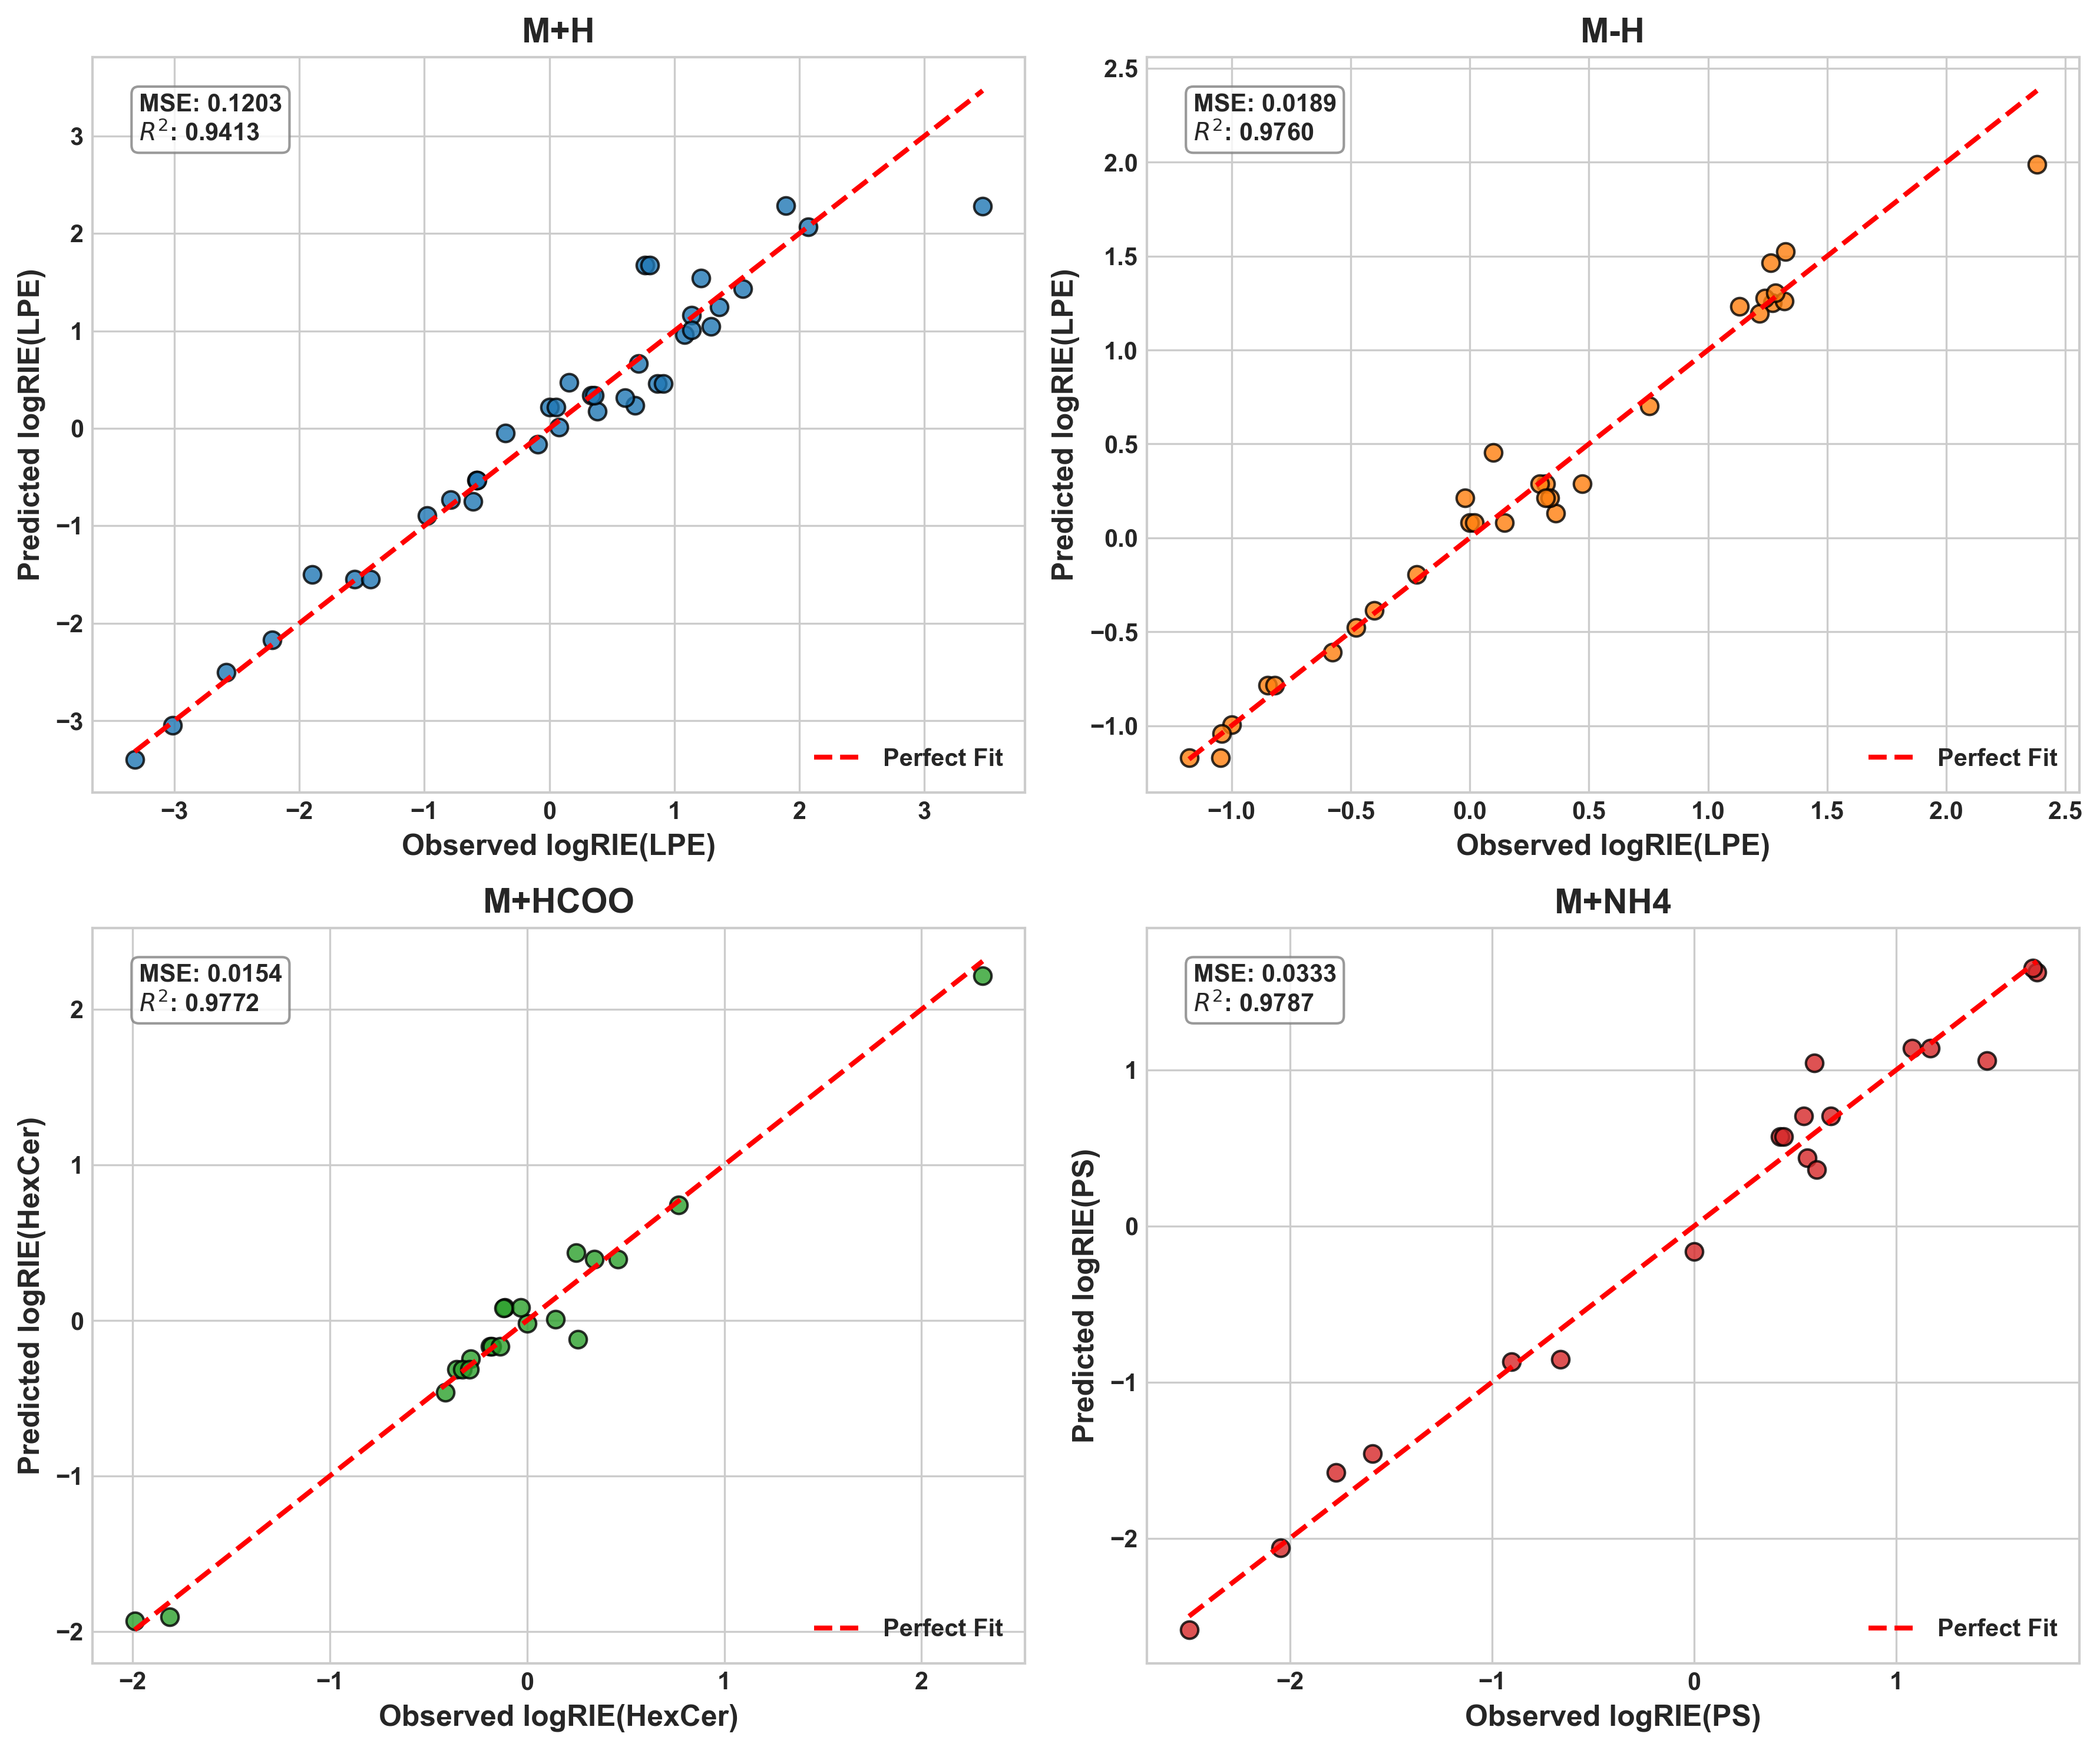

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Use a clean publication style
plt.style.use('seaborn-v0_8-whitegrid')

# List of CSV file names (update these paths as needed)
files = ['plot_data-M+H.csv', 'plot_data-M-H.csv', 'plot_data-M+HCOO.csv', 'plot_data-M+NH4.csv']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # one color per dataset

# Create a 2x2 grid of subplots with high resolution
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=300)
axes = axes.flatten()  # Flatten for easier iteration

# Loop over each file/dataset
for i, file in enumerate(files):
    # Read the current CSV file into a DataFrame
    df = pd.read_csv(file)
    ax = axes[i]
    color = colors[i]
    
    # Scatter plot for Observed vs Predicted
    ax.scatter(df['Observed'], df['Predicted'],
               color=color, s=50, alpha=0.8, edgecolor='k')
    
    # Create an array of x values for plotting the perfect fit line
    x_vals = np.linspace(df['Observed'].min(), df['Observed'].max(), 100)
    
    # Plot the perfect fit line (y = x)
    ax.plot(x_vals, x_vals, linestyle='--', color='red', lw=2, label='Perfect Fit')
    
    # Compute performance metrics: Mean Squared Error and R²
    mse = np.mean((df['Observed'] - df['Predicted'])**2)
    _, _, r_value, _, _ = linregress(df['Observed'], df['Predicted'])
    r2 = r_value**2
    
    # Create a statistics text box
    stats_text = f'MSE: {mse:.4f}\n$R^2$: {r2:.4f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props, fontweight='bold')
    
    # Set axis labels based on the file name
    x_label = 'Observed logRIE(LPE)'
    y_label = 'Predicted logRIE(LPE)'
    
    if 'M+NH4' in file:
        x_label = 'Observed logRIE(PS)'
        y_label = 'Predicted logRIE(PS)'
    elif 'M+HCOO' in file:
        x_label = 'Observed logRIE(HexCer)'
        y_label = 'Predicted logRIE(HexCer)'
    
    # Set bold labels and titles
    ax.set_xlabel(x_label, fontsize=12, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
    
    # Set subplot title by removing the 'plot_data-' prefix and the .csv extension
    base_name = os.path.splitext(os.path.basename(file))[0]
    title = base_name.replace("plot_data-", "")
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Display the legend with bold font
    ax.legend(fontsize=10, prop={'weight': 'bold'})
    
    # Set tick labels to bold
    ax.tick_params(axis='both', which='major', labelsize=10)
    [label.set_fontweight('bold') for label in ax.get_xticklabels()]
    [label.set_fontweight('bold') for label in ax.get_yticklabels()]

# Adjust layout and export the figure
plt.tight_layout()
plt.savefig('4_separate_plots_bold_labels.svg', dpi=300, bbox_inches='tight')
plt.show()